In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from json_parser_trivy import create_df

In [2]:
df= create_df()
print(df)

         VulnerabilityID           PkgName    Status Severity  \
0    GHSA-mg85-8mv5-ffjr              ammo  affected     HIGH   
1    GHSA-36jr-mh4h-2g58          d3-color     fixed     HIGH   
2         CVE-2024-27088           es5-ext     fixed      LOW   
3         CVE-2023-26159  follow-redirects     fixed   MEDIUM   
4         CVE-2024-28849  follow-redirects     fixed   MEDIUM   
..                   ...               ...       ...      ...   
186        CVE-2021-3765         validator     fixed   MEDIUM   
187        CVE-2021-3765         validator     fixed   MEDIUM   
188  GHSA-xx4c-jj58-r7x6         validator     fixed   MEDIUM   
189        CVE-2021-3765         validator     fixed   MEDIUM   
190       CVE-2023-26115         word-wrap     fixed   MEDIUM   

                                       Container  
0    jsons/DepScan/sboms/kibana:8.12.2_sbom.json  
1    jsons/DepScan/sboms/kibana:8.12.2_sbom.json  
2    jsons/DepScan/sboms/kibana:8.12.2_sbom.json  
3    jsons/DepS

<Axes: >

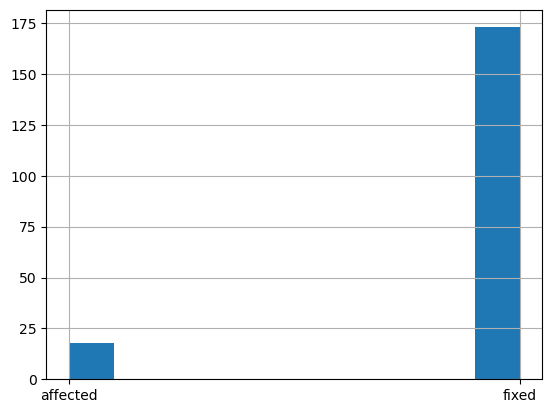

In [5]:
df['Status'].hist()

<Axes: >

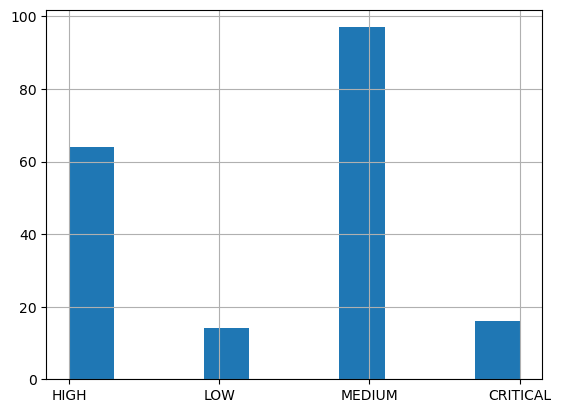

In [6]:
df['Severity'].hist()

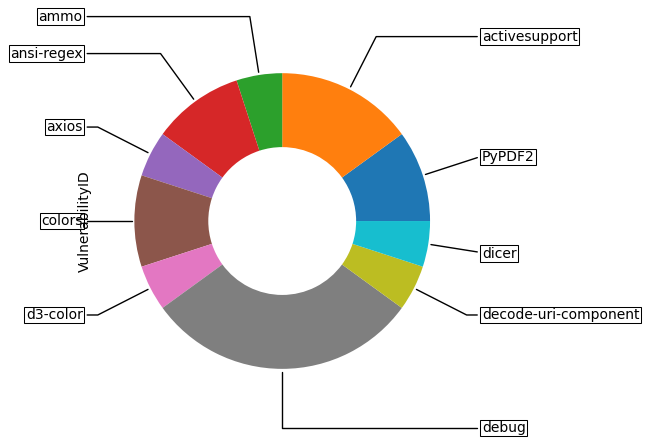

In [7]:
import numpy as np
import random
df_plot = df.groupby(['PkgName']).count().head(10)
axes = df_plot.plot.pie(y='VulnerabilityID', startangle=0, radius=1, legend=None, labels=None, wedgeprops=dict(width=0.5))
wedges = axes.patches
bbox_props = dict(boxstyle="square,pad=0.1", fc="w", ec="k", lw=0.75)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=1, va="center")

for i, p in enumerate(wedges):
    name_df = df_plot.iloc[[i]].index.tolist()[0]
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    axes.annotate(name_df, xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

In [8]:
containers = df['Container'].unique()

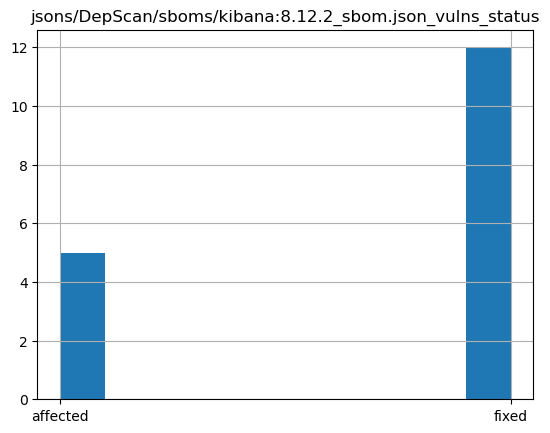

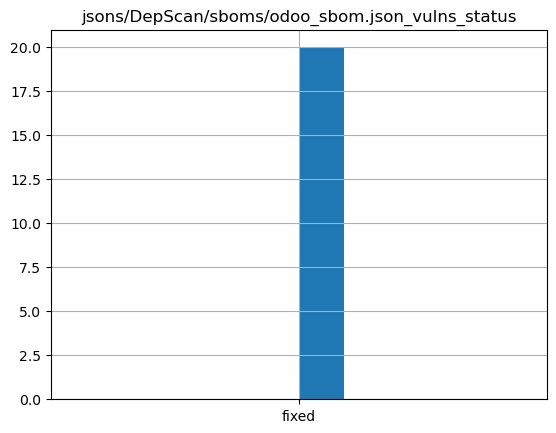

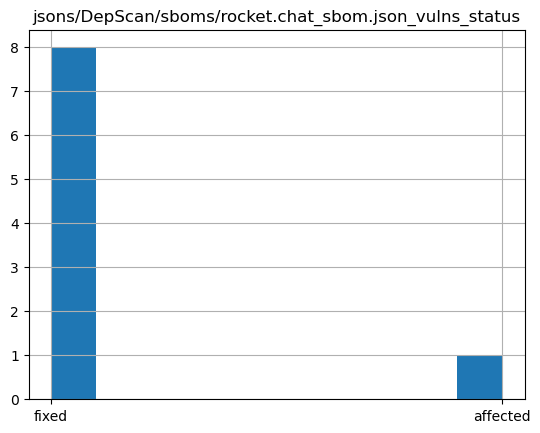

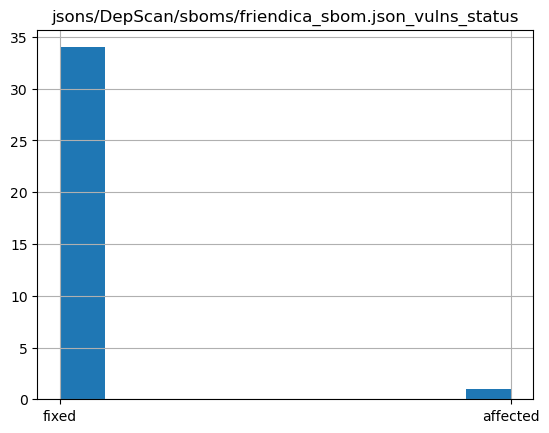

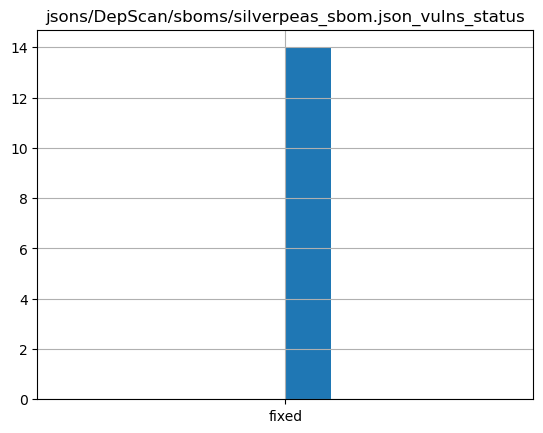

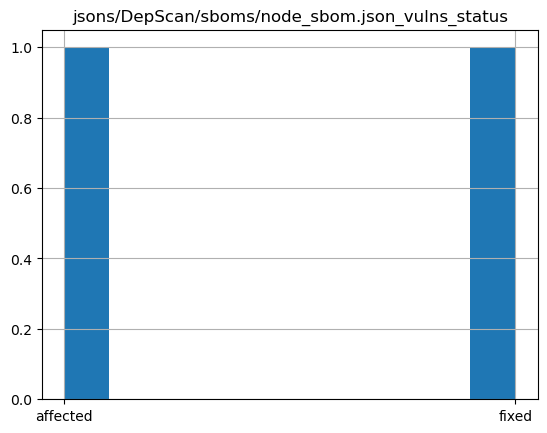

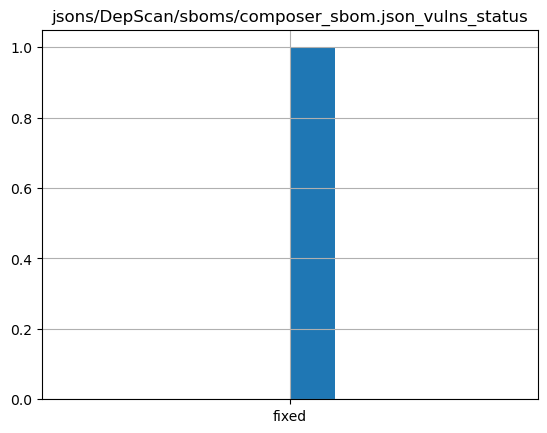

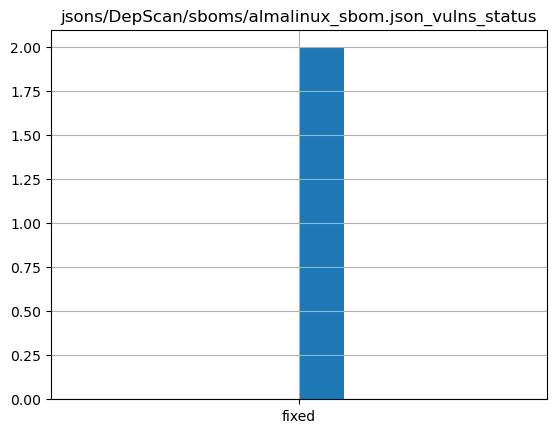

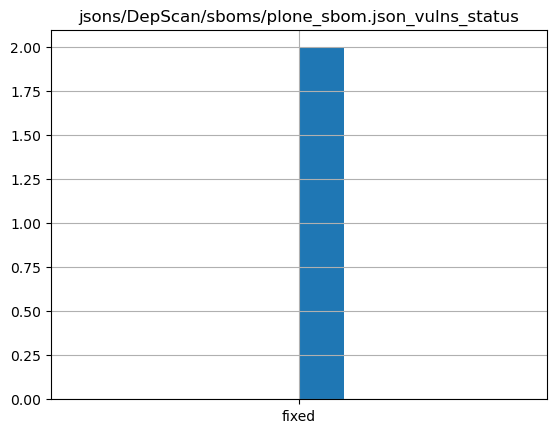

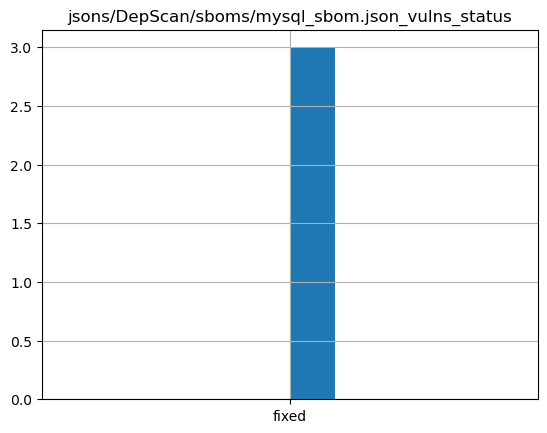

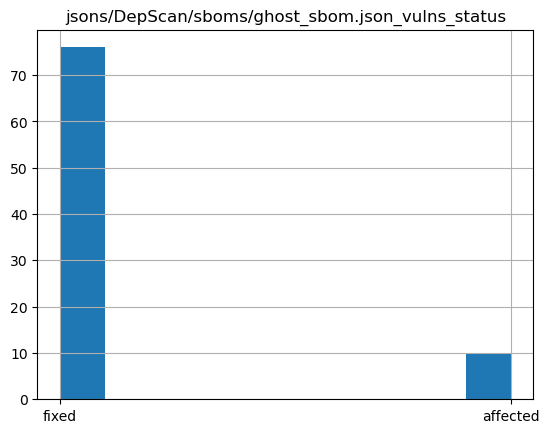

In [9]:
for container in containers:
    df.loc[df['Container'] == container]['Status'].hist()
    plt.title(container+"_vulns_status")
    plt.show()

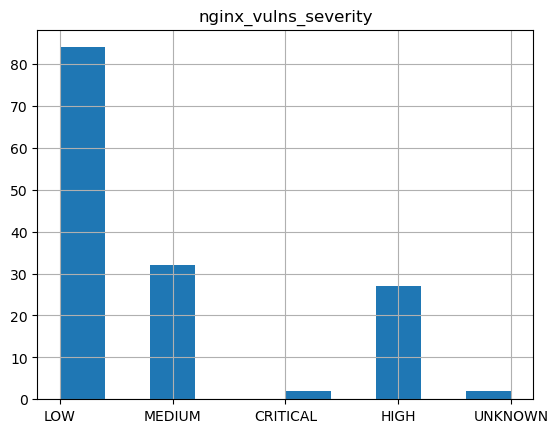

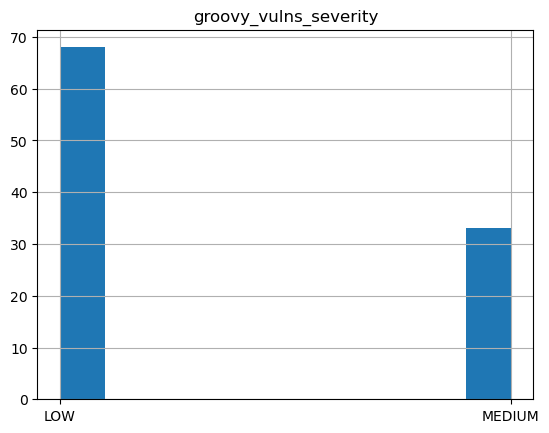

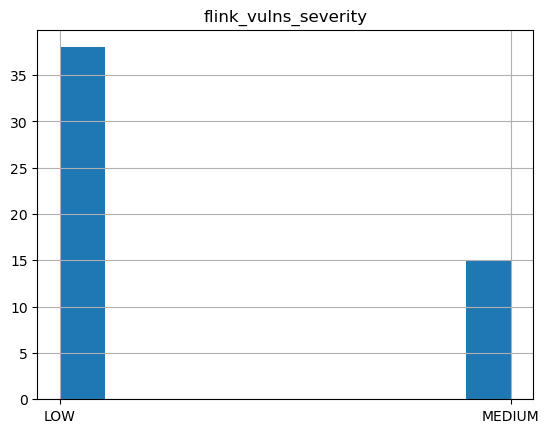

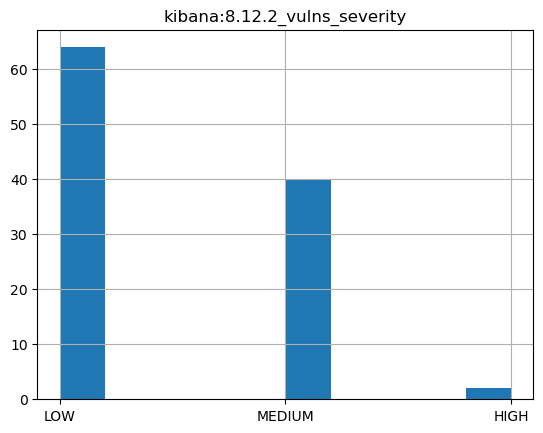

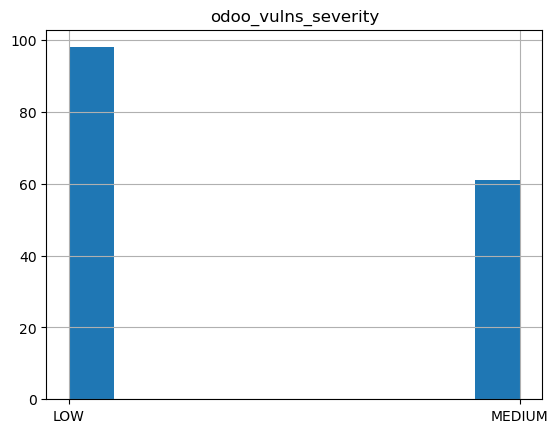

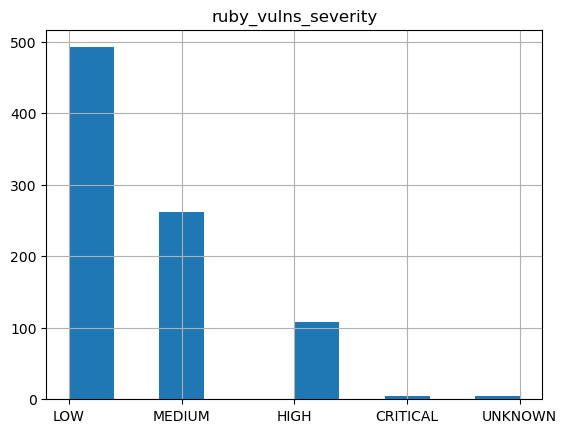

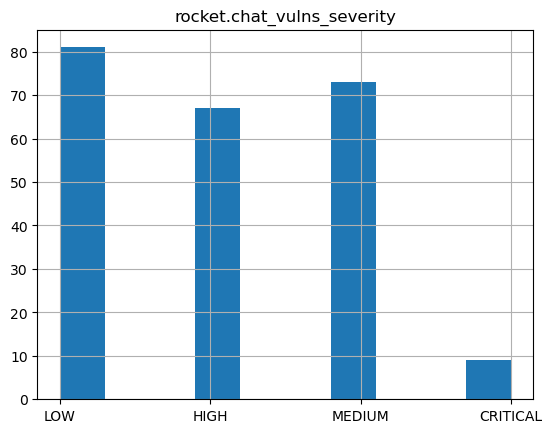

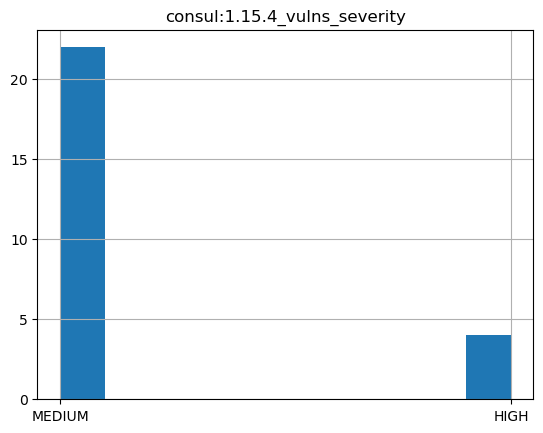

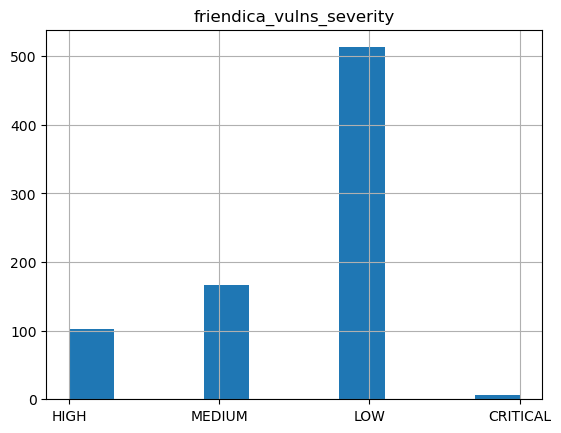

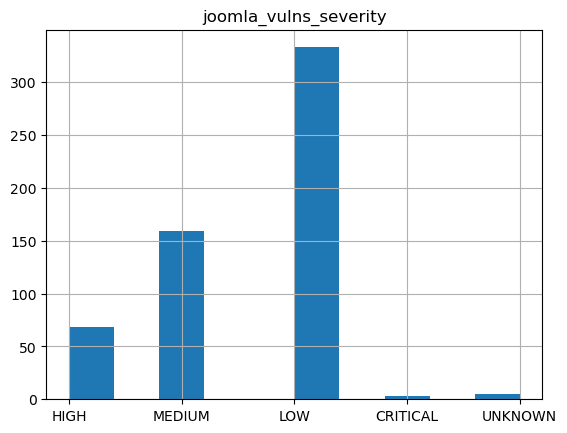

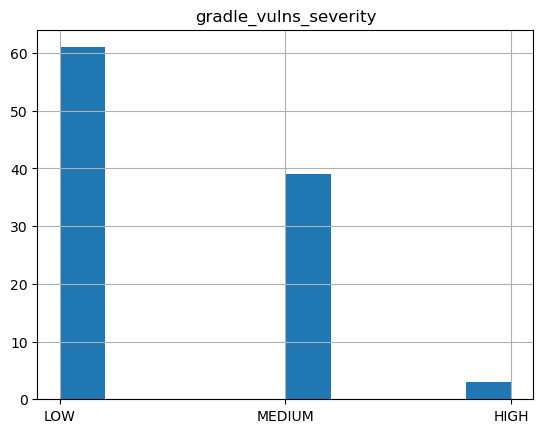

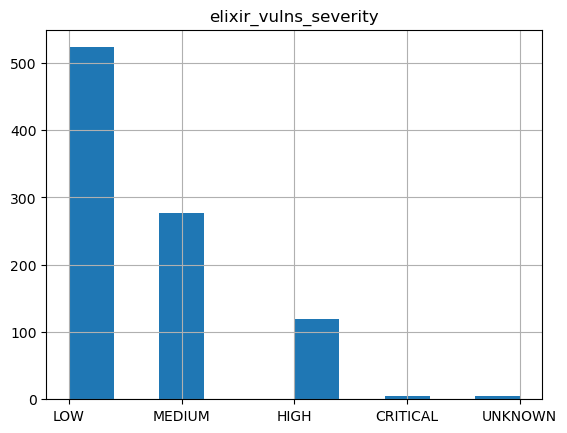

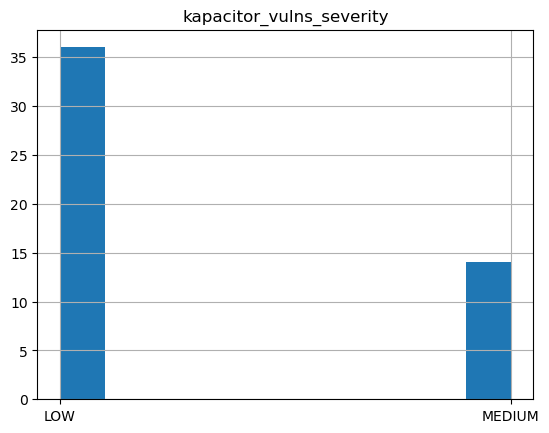

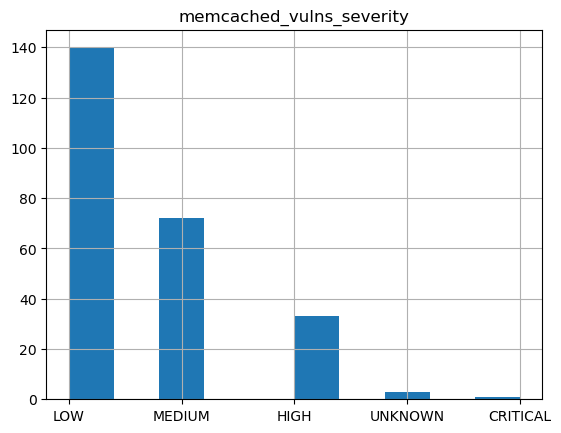

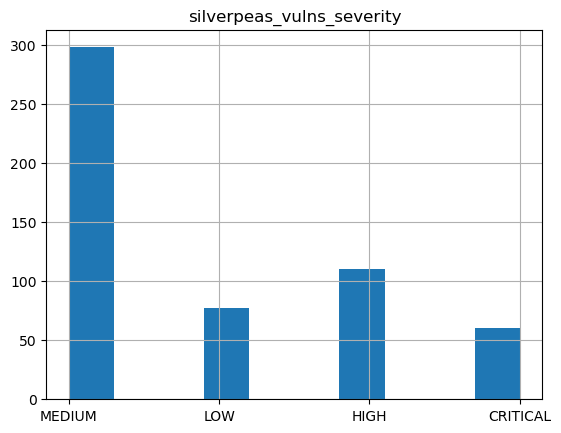

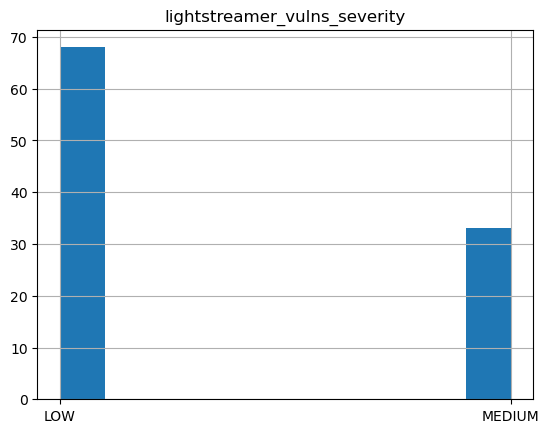

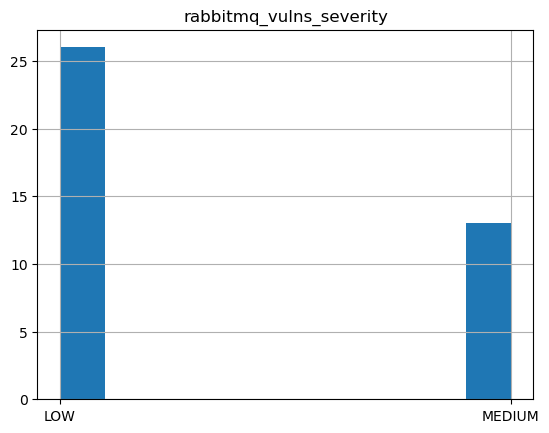

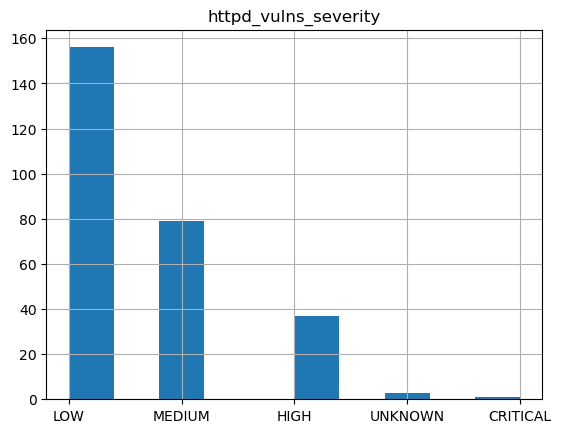

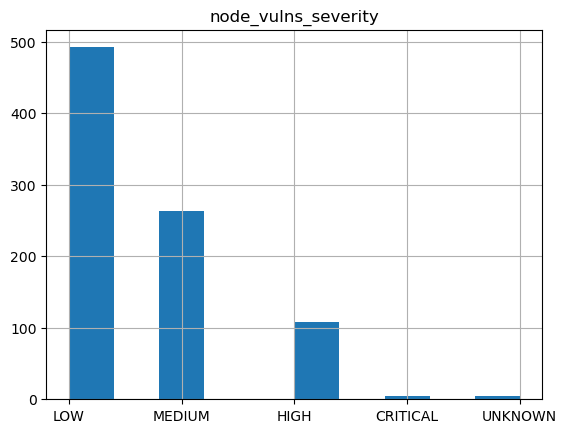

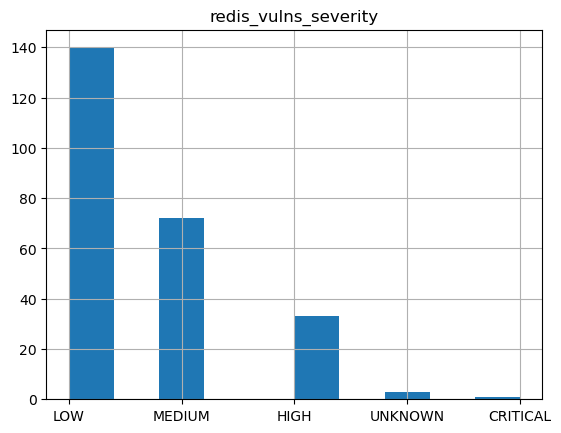

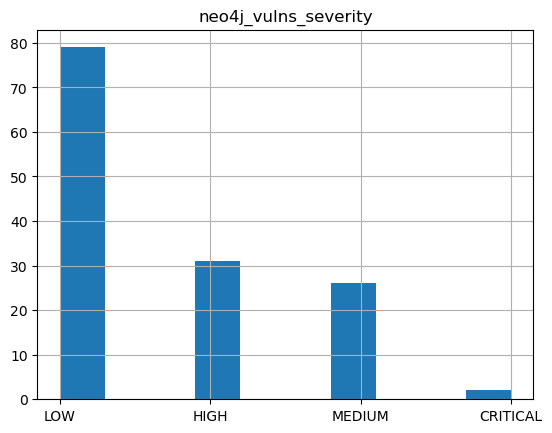

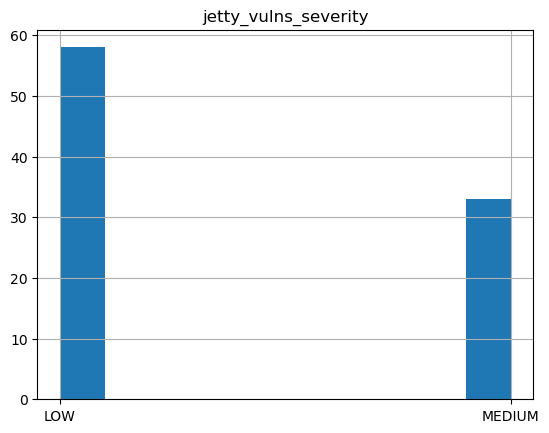

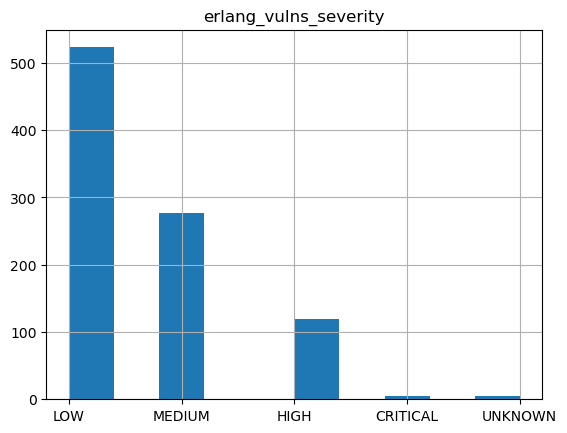

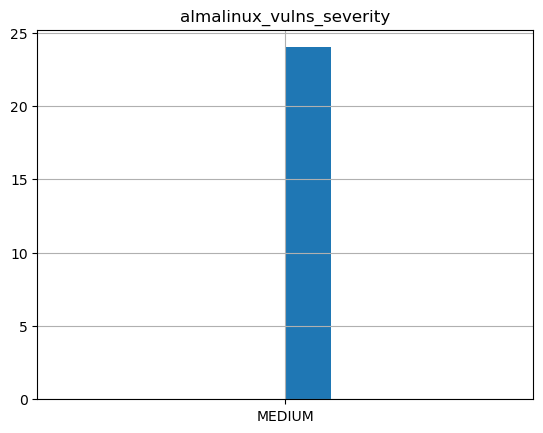

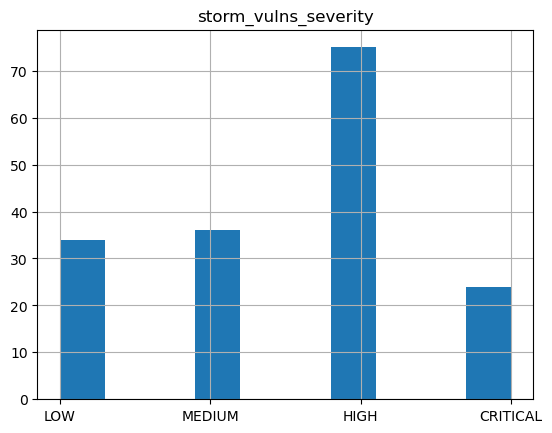

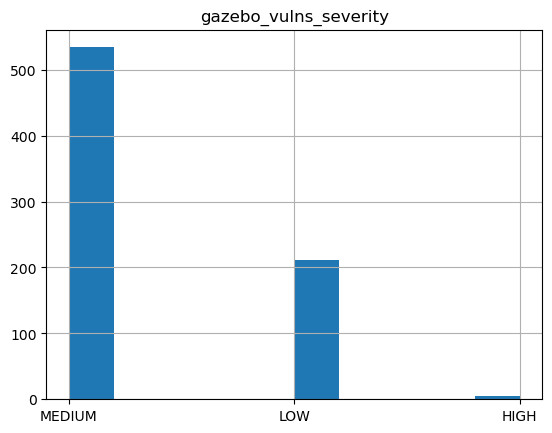

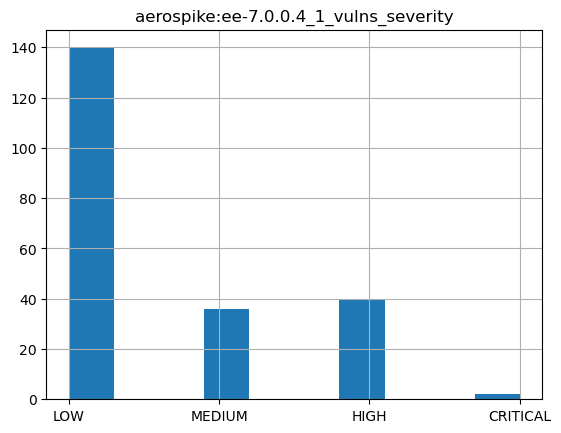

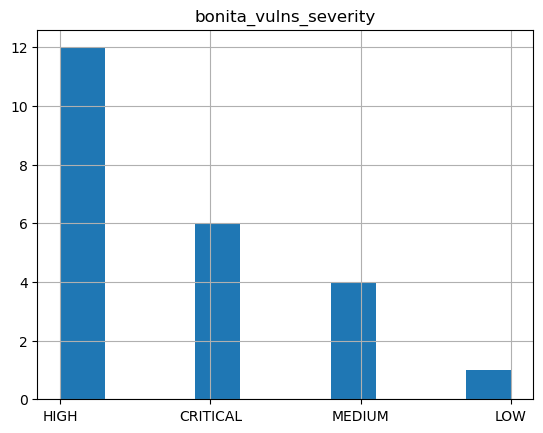

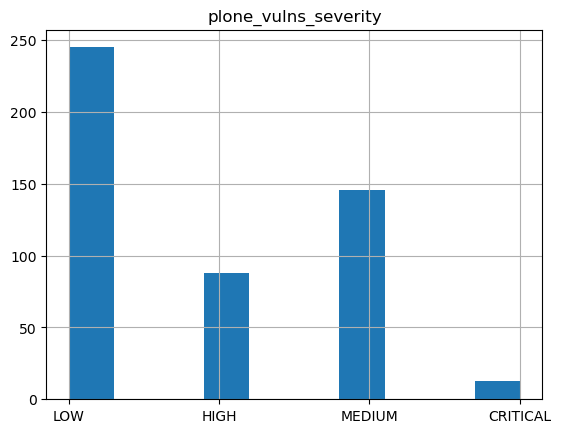

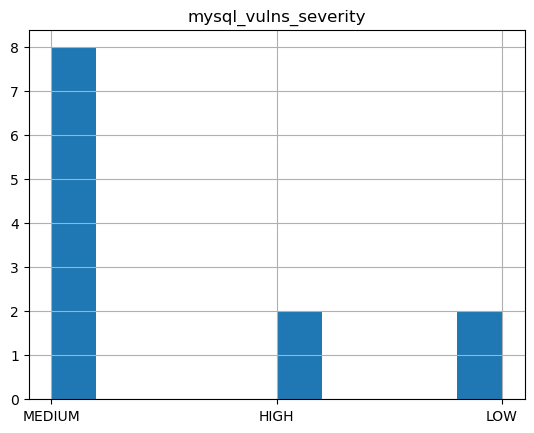

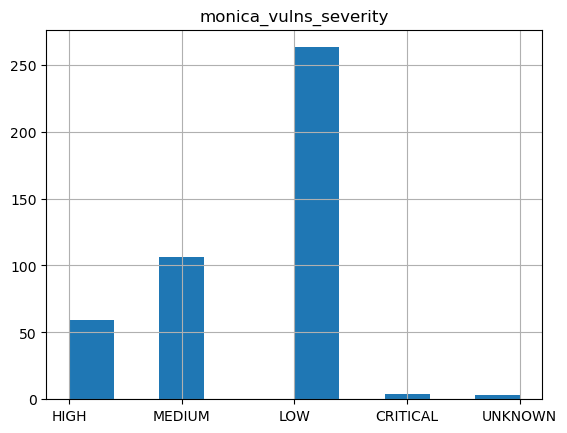

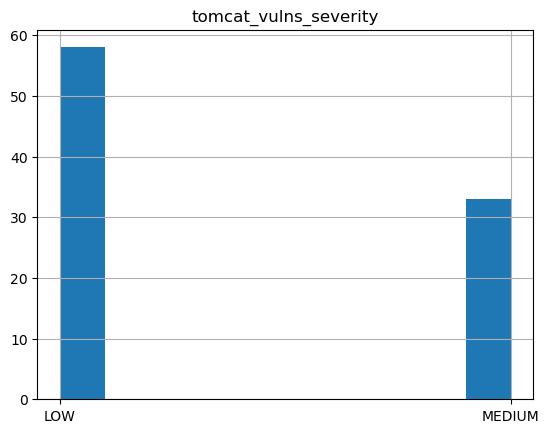

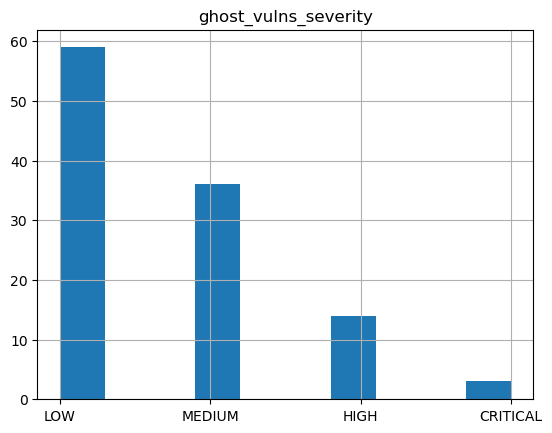

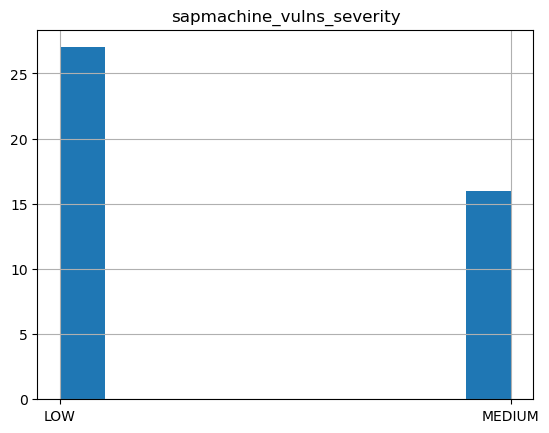

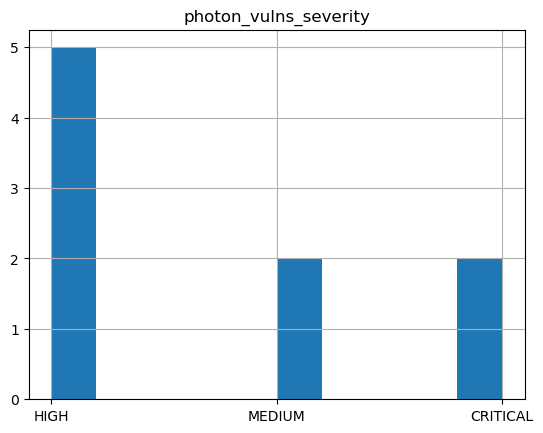

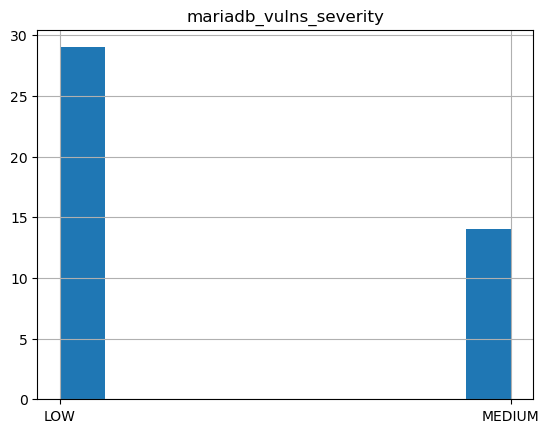

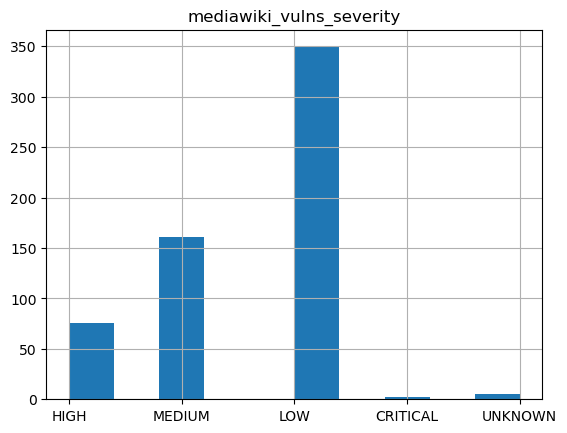

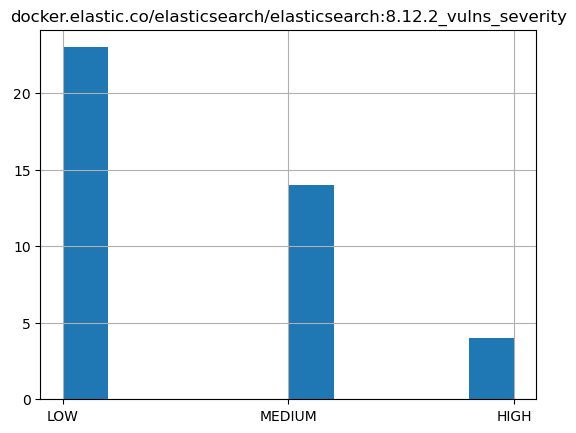

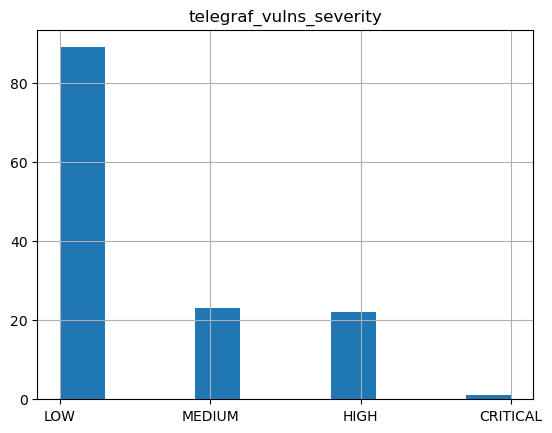

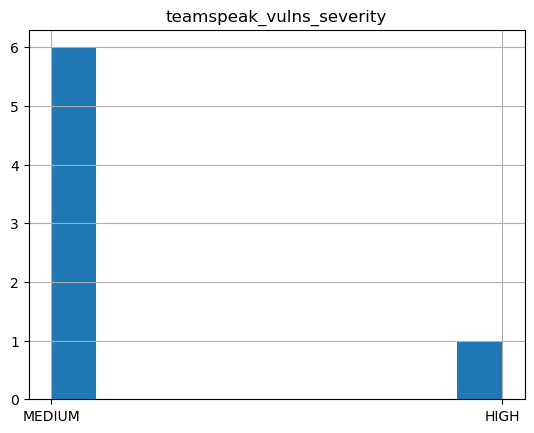

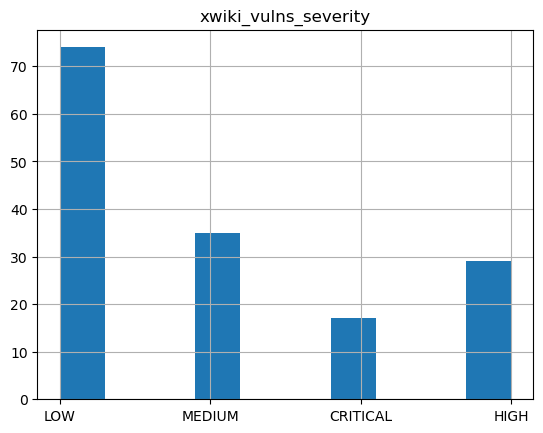

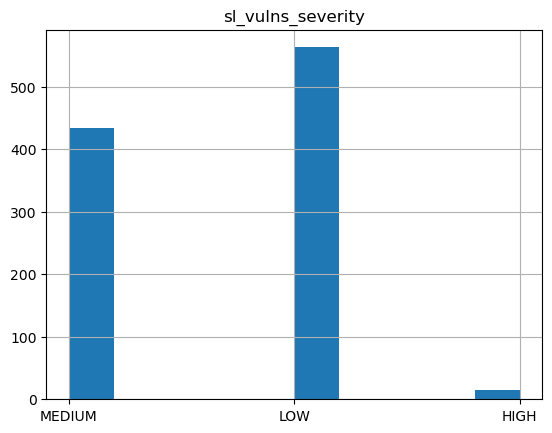

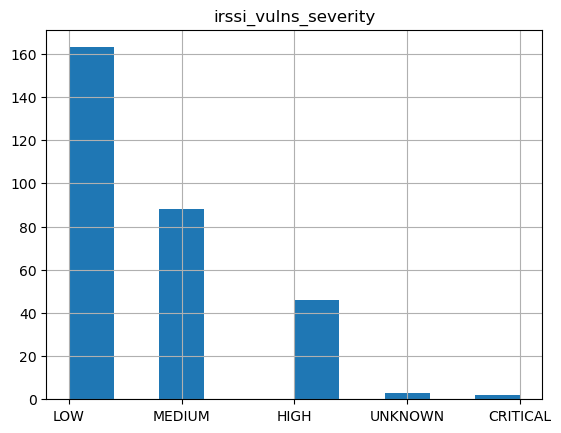

In [19]:
for container in containers:
    df.loc[df['Container'] == container]['Severity'].hist()
    plt.title(container+"_vulns_severity")
    plt.show()

In [10]:
len(df.loc[df['Severity'] == "CRITICAL"])

16